# &#10140; ortools基于MP求解TSP</br>
# &#10140; ortools基于CP求解TSP</br>

ortools基于MP求解TSP

In [1]:
from ortools.linear_solver import pywraplp
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

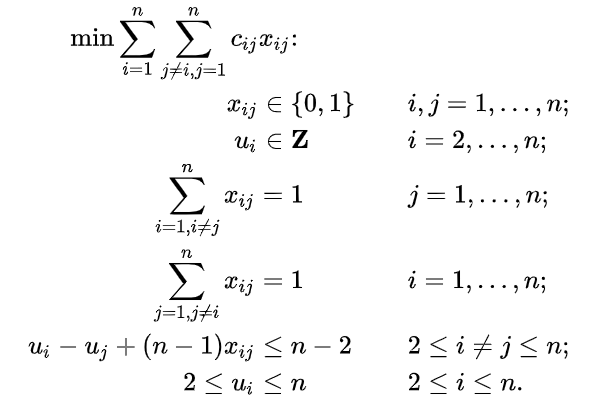

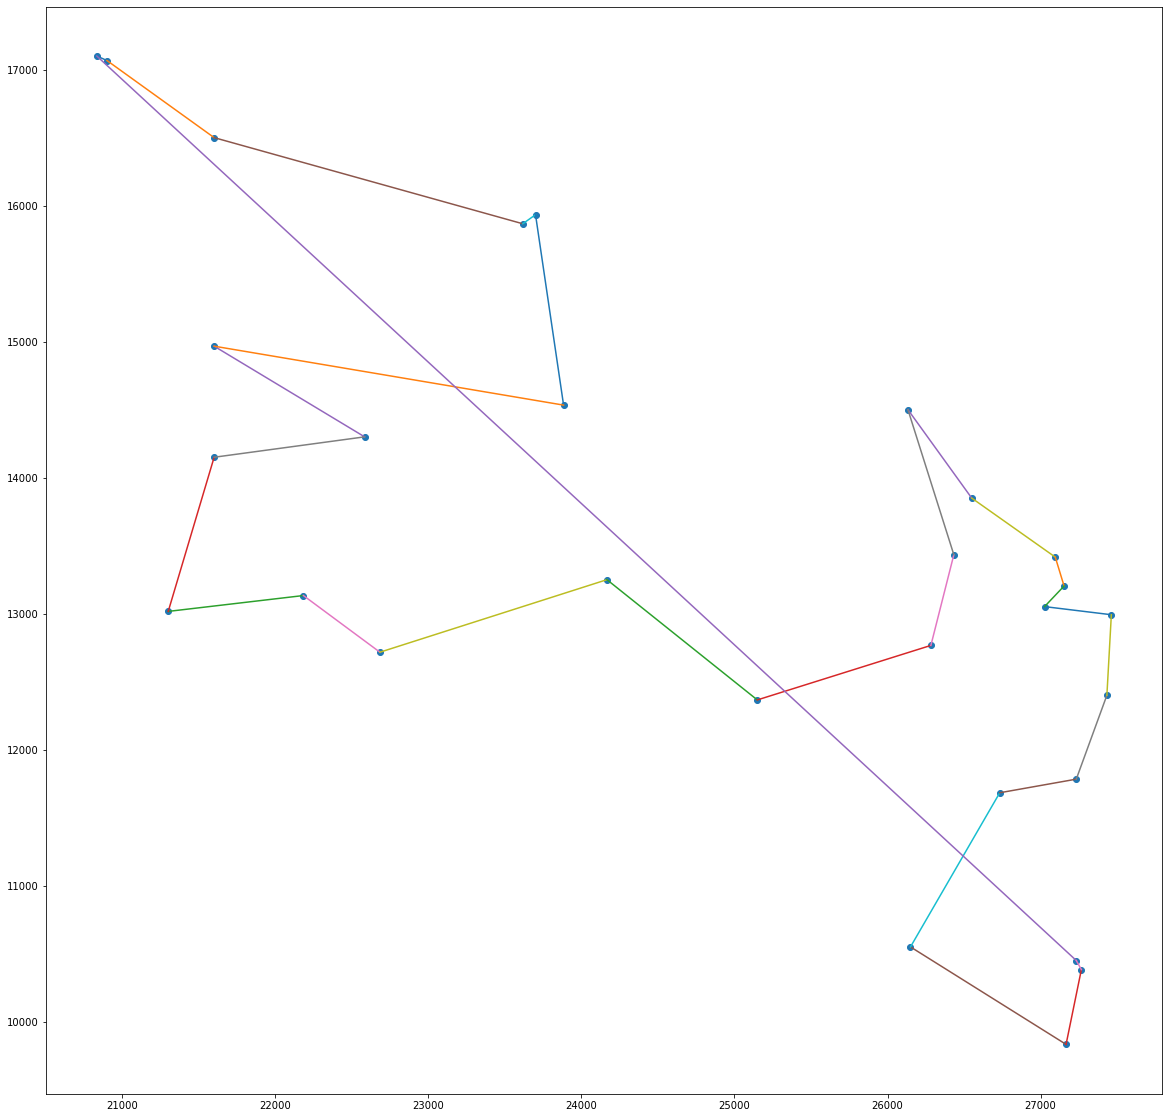

In [12]:
# 图数据
coords = [[20833.3333, 17100.0000],
[20900.0000, 17066.6667],
[21300.0000, 13016.6667],
[21600.0000, 14150.0000],
[21600.0000, 14966.6667],
[21600.0000, 16500.0000],
[22183.3333, 13133.3333],
[22583.3333, 14300.0000],
[22683.3333, 12716.6667],
[23616.6667, 15866.6667],
[23700.0000, 15933.3333],
[23883.3333, 14533.3333],
[24166.6667, 13250.0000],
[25149.1667, 12365.8333],
[26133.3333, 14500.0000],
[26150.0000, 10550.0000],
[26283.3333, 12766.6667],
[26433.3333, 13433.3333],
[26550.0000, 13850.0000],
[26733.3333, 11683.3333],
[27026.1111, 13051.9444],
[27096.1111, 13415.8333],
[27153.6111, 13203.3333],
[27166.6667, 9833.3333],
[27233.3333, 10450.0000],
[27233.3333, 11783.3333],
[27266.6667, 10383.3333],
[27433.3333, 12400.0000],
[27462.5000, 12992.2222]]

dist_matrix = distance.cdist(coords, coords, 'euclidean')

# 创建求解器
solver = pywraplp.Solver.CreateSolver("SCIP")

# 创建变量
x = {}
for i in range(1, 30):
    for j in range(1, 30):
        x[(i, j)] = solver.IntVar(0, 1, "")
u = {}
for i in range(2, 30):
    u[i] = solver.IntVar(2, 29, "")

# 创建约束
for j in range(1, 30):
    solver.Add(sum(x[(i, j)] for i in range(1, 30) if i != j) == 1)
    
for i in range(1, 30):
    solver.Add(sum(x[(i, j)] for j in range(1, 30) if i != j) == 1)
    
for i in range(2, 30):
    for j in range(2, 30):
        if i != j:
            solver.Add(u[i] - u[j] + 28 * x[(i, j)] <= 27)
            
# 创建目标函数
solver.Minimize(solver.Sum(x[(i, j)] * dist_matrix[i-1, j-1] for i in range(1, 30) for j in range(1, 30) if i != j))

# 设置最长求解时间
solver.SetTimeLimit(10000)

# 求解
status = solver.Solve()

# 画图
fig = plt.figure(figsize=(20, 20))
plt.scatter([item[0] for item in coords], [item[1] for item in coords])
for i in range(1, 30):
    for j in range(1, 30):
        if x[(i, j)].solution_value():
            plt.plot([coords[i-1][0], coords[j-1][0]], [coords[i-1][1], coords[j-1][1]])

ortools基于MP求解TSP

In [4]:
pywrapcp.RandomDemand()

AttributeError: module 'ortools.constraint_solver.pywrapcp' has no attribute 'RandomDemand'

In [1]:
from ortools.linear_solver import pywraplp

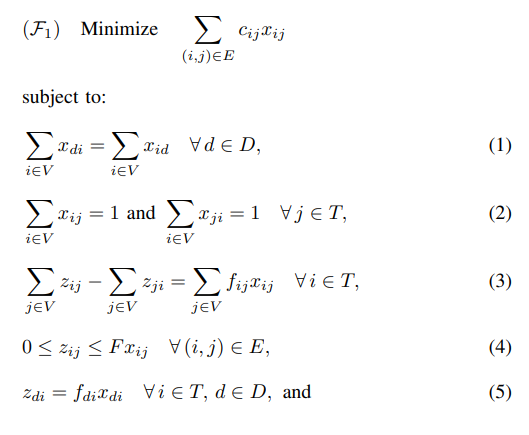
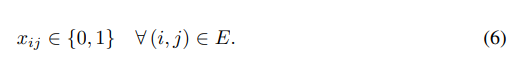

In [2]:
solver = pywraplp.Solver.CreateSolver("SCIP")

In [3]:
%%time
coords = [
[21600.0000, 16500.0000],
[22183.3333, 13133.3333],
[22583.3333, 14300.0000],
[22683.3333, 12716.6667],
[23616.6667, 15866.6667],
[23700.0000, 15933.3333],
[23883.3333, 14533.3333],
[20833.3333, 17100.0000],
[20900.0000, 17066.6667],
[21300.0000, 13016.6667],
[21600.0000, 14150.0000],
[21600.0000, 14966.6667],
[24166.6667, 13250.0000],
[25149.1667, 12365.8333],
[26133.3333, 14500.0000],
[26150.0000, 10550.0000],
[26283.3333, 12766.6667],
[26433.3333, 13433.3333],
[26550.0000, 13850.0000],
[26733.3333, 11683.3333],
[27026.1111, 13051.9444],
[27096.1111, 13415.8333],
[27153.6111, 13203.3333],
[27166.6667, 9833.3333],
[27233.3333, 10450.0000],
[27233.3333, 11783.3333],
[27266.6667, 10383.3333],
[27433.3333, 12400.0000],
[27462.5000, 12992.2222]]

dist_matrix = distance.cdist(coords, coords, 'euclidean')

x = {}
z = {}
F = 20000
n_depot = 2
n_node = 29
n_customer = n_node - n_depot
for i in range(n_node):
    for j in range(n_node):
        x[(i, j)] = solver.IntVar(0, 1, "")
        z[(i, j)] = solver.NumVar(0, F, "")

for d in range(n_depot):
    solver.Add(sum(x[(d, i)] for i in range(n_node)) == sum(x[(j, d)] for j in range(n_node)))
    
for j in range(n_depot, n_node):
    solver.Add(sum(x[(i, j)] for i in range(n_node) if i != j) == 1)
    solver.Add(sum(x[(j, i)] for i in range(n_node) if i != j) == 1)

for i in range(n_depot, n_node):
    solver.Add(sum(z[(i, j)] for j in range(n_node)) - sum(z[(j, i)] for j in range(n_node)) == sum(dist_matrix[i, j] * x[(i, j)] for j in range(n_node)))

for i in range(n_depot, n_node):
    for d in range(n_depot):
        solver.Add(z[(d, i)] == dist_matrix[d, i] * x[(d, i)])

for i in range(n_node):
    for j in range(n_node):
        solver.Add(z[(i, j)] <= F * x[(i, j)])

# 创建目标函数
solver.Minimize(solver.Sum(x[(i, j)] * dist_matrix[i, j] for i in range(0, 29) for j in range(0, 29)))

# 设置最长求解时间
solver.SetTimeLimit(10000)

# 求解
status = solver.Solve()

CPU times: total: 5.5 s
Wall time: 9.9 s


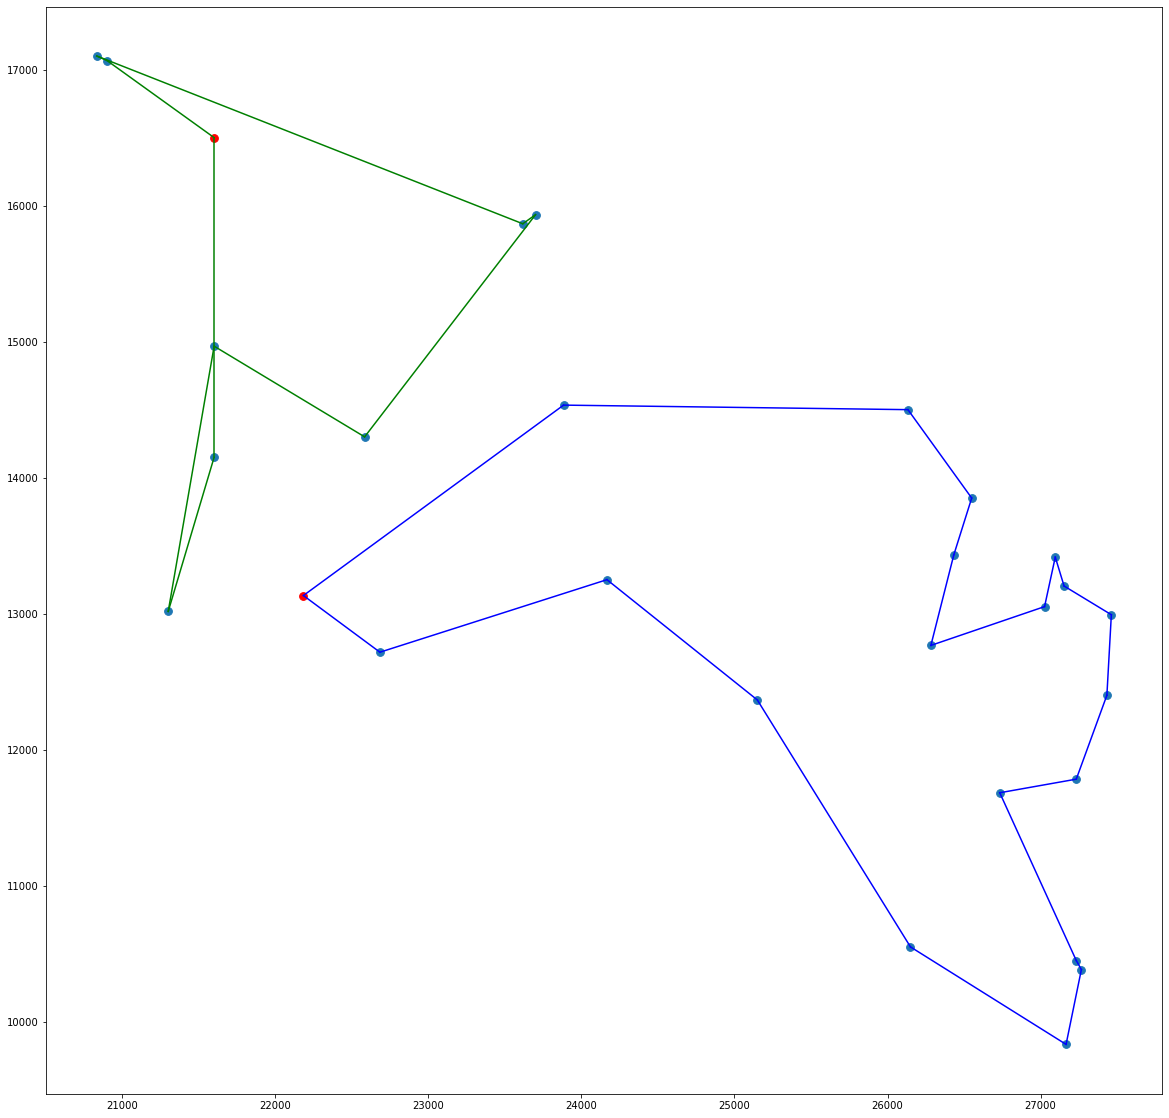

In [11]:
fig = plt.figure(figsize=(20, 20))
plt.scatter([item[0] for item in coords[n_depot:]], [item[1] for item in coords[n_depot:]], s=60)
plt.scatter([item[0] for item in coords[:n_depot]], [item[1] for item in coords[:n_depot]], color='red', s=60)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

depot_begin = []
for i in range(n_depot):
    for j in range(n_node):
        if i != j:
            if x[(i, j)].solution_value():
                depot_begin.append((i, j))

color_idx = 0
while depot_begin:
    begin_node, current_node = depot_begin.pop()
    plt.plot([coords[begin_node][0], coords[current_node][0]], [coords[begin_node][1], coords[current_node][1]], color = colors[color_idx])
    while current_node not in range(n_depot):
        for i in range(n_node):
            if i != current_node and x[(current_node, i)].solution_value():
                plt.plot([coords[current_node][0], coords[i][0]], [coords[current_node][1], coords[i][1]], color = colors[color_idx])
                current_node = i
                break   
    color_idx += 1

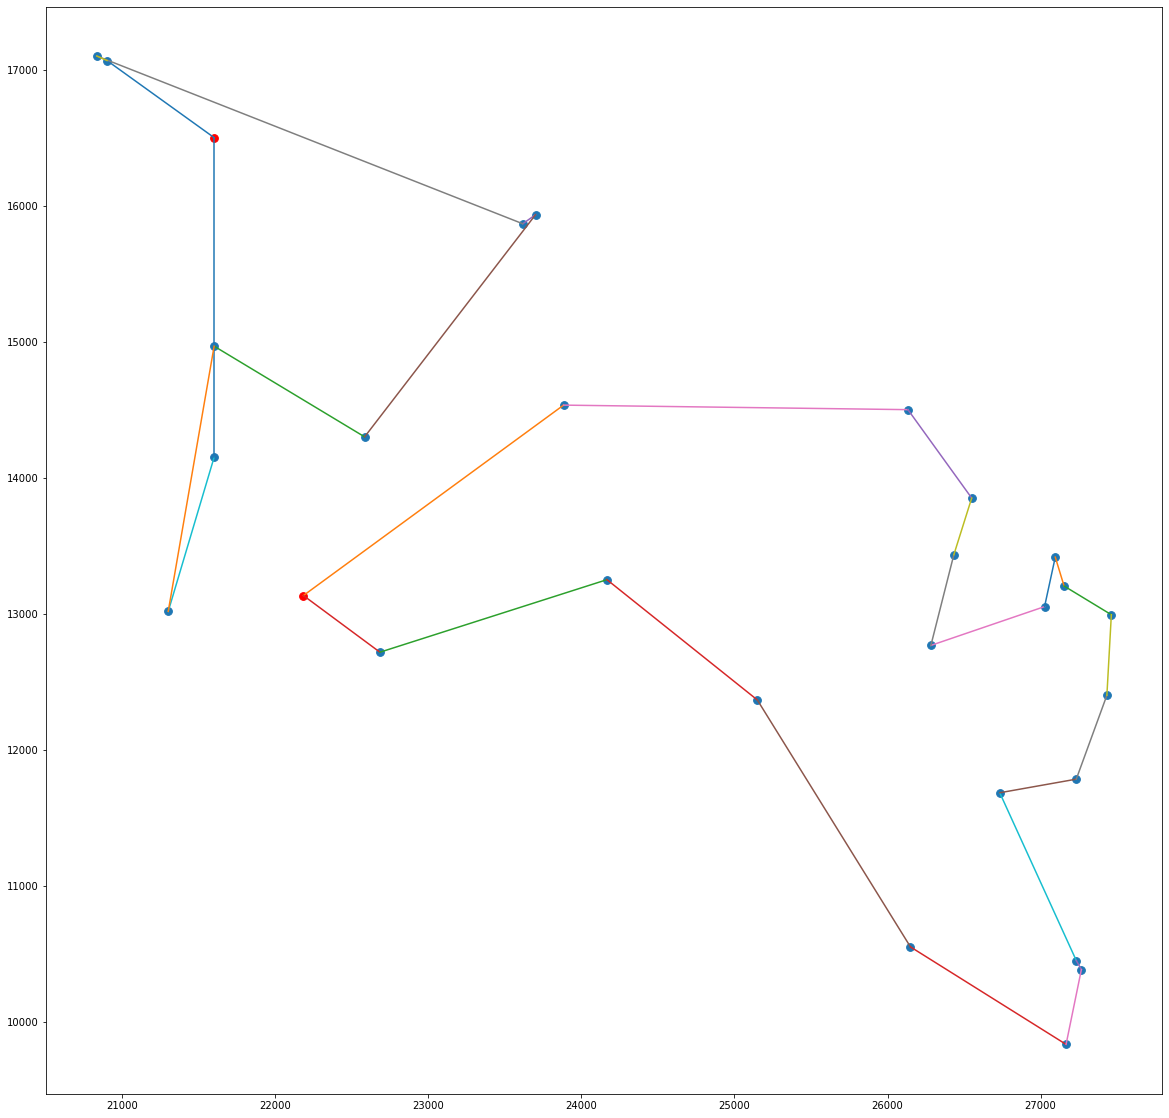

In [12]:
fig = plt.figure(figsize=(20, 20))
plt.scatter([item[0] for item in coords[n_depot:]], [item[1] for item in coords[n_depot:]], s=60)
plt.scatter([item[0] for item in coords[:n_depot]], [item[1] for item in coords[:n_depot]], color='red', s=60)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for i in range(n_node):
    for j in range(n_node):
        if i!= j:
            if x[(i, j)].solution_value():
                plt.plot([coords[i][0], coords[j][0]], [coords[i][1], coords[j][1]])